In [151]:
import pandas as pd
import tensorflow as tf
from sklearn import model_selection
import random

In [152]:
import os
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2
from sklearn import preprocessing

In [153]:
df = pd.read_csv('test_gtruth.csv')
df.set_index('TEMPLATE_ID', inplace = True)

In [154]:
name_of_dark = os.listdir('cropped_data/reconstructed_dark')
y_labels = []
x_data = []
co = 0
for name in name_of_dark:
    if name[0] == '.':
        continue
    co = co + 1
    alpha = int(name[0:-4])        
    val = df.loc[alpha]['SKIN_COLOUR']
    assert(val == 1)
    
    
    data = loadmat('cropped_data/reconstructed_dark/' + name)['rec_hs']
    nd = np.array(data)
    if nd.shape == (40,40,31):
        x_data.append(data)
        y_labels.append(val)
    
name_of_light = os.listdir('cropped_data/reconstructed_light')

co = 0
for name in name_of_light:
    if name[0] == '.':
        continue
    co = co + 1
    alpha = int(name[0:-4])        
    val = df.loc[alpha]['SKIN_COLOUR']
    assert(val == 0)
    
    
    data = loadmat('cropped_data/reconstructed_light/' + name)['rec_hs']
    nd = np.array(data)
    if nd.shape == (40,40,31):
        x_data.append(data)
        y_labels.append(val)

x_data = np.array(x_data)
y_labels = np.array(y_labels)

In [155]:
print(x_data.shape)
print(y_labels.shape)

(9988, 40, 40, 31)
(9988,)


In [156]:
x_data = x_data.reshape(x_data.shape[0], -1, x_data.shape[3]).transpose(0,2,1)
print(x_data.shape)

(9988, 31, 1600)


In [157]:
def change_dimensions(data, n_components):
    m = data.shape[0]
    tr = np.ones((data.shape[0], data.shape[1], n_components))
    for i in range(0, m):
        temp = data[i,:,:]
        pca = PCA(n_components = n_components)
        pca.fit(temp)
        res = pca.transform(temp)
        tr[i,:,:] = res
    return tr
        

In [158]:
def change_dimensions_alternate(data, n_components):
    m = data.shape[1]
    tr = np.ones((data.shape[0], data.shape[1], n_components))
    for i in range(0, m):
        temp = data[:,i,:]
        pca = PCA(n_components = n_components)
        pca.fit(temp)
        res = pca.transform(temp)
        tr[:,i,:] = res
    return tr

In [159]:
x_data = change_dimensions(x_data, 3)
print(x_data.shape)

(9988, 31, 3)


In [160]:
x_data = x_data.reshape(x_data.shape[0], -1)
x_data = preprocessing.normalize(x_data)
print(x_data.shape)

(9988, 93)


In [161]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_data, y_labels, train_size=0.8, random_state=1)

In [162]:
modeln = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation = tf.nn.relu,input_dim=93),
    tf.keras.layers.Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1()),
    tf.keras.layers.Dense(10,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.01)

modeln.compile(optimizer = opt,
               loss='binary_crossentropy',metrics=['accuracy'])

In [163]:
modeln.fit(x_train, y_train, epochs=200, batch_size = 64, validation_data = (x_test,y_test))

Train on 7990 samples, validate on 1998 samples
Epoch 1/200
7990/7990 [==============================] - 1s 114us/step - loss: 2.4587 - acc: 0.5015 - val_loss: 1.8699 - val_acc: 0.4975
Epoch 2/200
7990/7990 [==============================] - 0s 17us/step - loss: 1.5622 - acc: 0.5237 - val_loss: 1.3187 - val_acc: 0.4965
Epoch 3/200
7990/7990 [==============================] - 0s 18us/step - loss: 1.1683 - acc: 0.5015 - val_loss: 1.0440 - val_acc: 0.4955
Epoch 4/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.9608 - acc: 0.5018 - val_loss: 0.8903 - val_acc: 0.4970
Epoch 5/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.8419 - acc: 0.5016 - val_loss: 0.8002 - val_acc: 0.4975
Epoch 6/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.7709 - acc: 0.5130 - val_loss: 0.7459 - val_acc: 0.5190
Epoch 7/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.7289 - acc: 0.5078 - val_loss: 0.7143 - val_acc: 0.4955

7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 61/200
7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 62/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 63/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 64/200
7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 65/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 66/200
7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 67/200
7990/7990 [==============================

Epoch 120/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 121/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 122/200
7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 123/200
7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 124/200
7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 125/200
7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 126/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 127/200
7990/7990 [=========

7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 180/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 181/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 182/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 183/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 184/200
7990/7990 [==============================] - 0s 17us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 185/200
7990/7990 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4955
Epoch 186/200
7990/7990 [=======================

In [164]:
def plot_graph(light, dark):
    fig = plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(20)
    num = len(light)
    for i in range(num):
        j = 0
        while j < len(light[i])//31:
            plt.plot(light[i][j:-1:len(light[i])//31], marker='o', c='r')
            j += 1
    for i in range(num):
        j = 0
        while j < len(dark[i])//31:
            plt.plot(dark[i][j:-1:len(dark[i])//31], marker='o', c='b')
            j += 1
    plt.show()

In [173]:
light = []
dark = []
skip = random.randint(1,500)
count = 5

for i in range(len(y_labels)):
    if y_labels[i] == 0:
        if skip > 0:
            skip -= 1
        else :
            if count == 0:
                break
            light.append(x_data[i])
            count -= 1

skip = random.randint(1,500)
count = 5

for i in range(len(y_labels)):
    if y_labels[i] == 1:
        if skip > 0:
            skip -= 1
        else :
            if count == 0:
                break
            dark.append(x_data[i])
            count -= 1

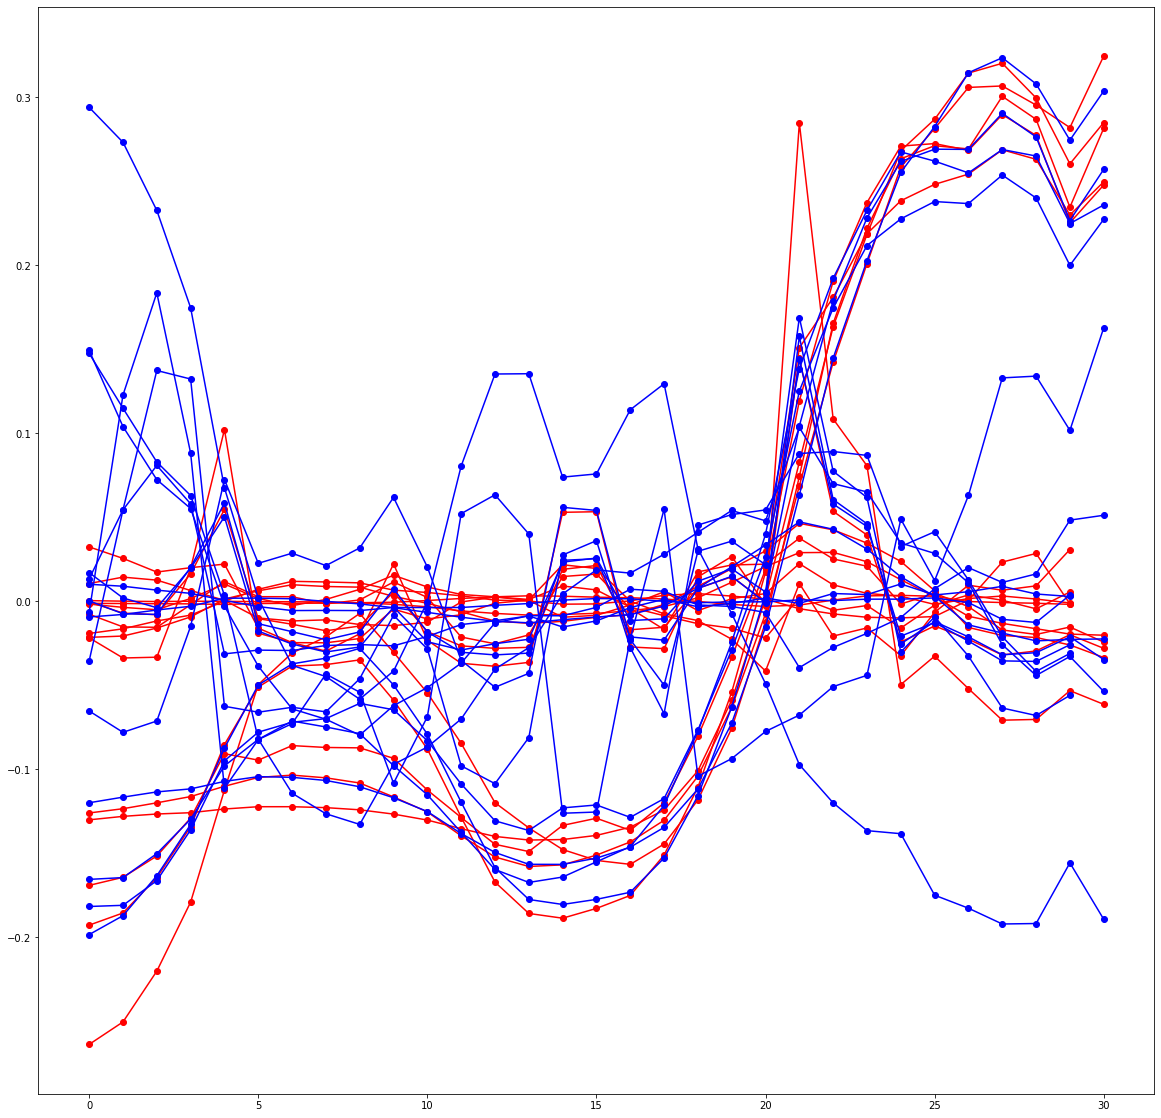

In [174]:
plot_graph(light, dark)

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
logisticRegr = LogisticRegression(max_iter = 10000)

In [177]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [178]:
pred = logisticRegr.predict(x_test)

In [179]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.5930930930930931


In [180]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
model = KNeighborsClassifier(n_neighbors=6)

In [182]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [183]:
pred = model.predict(x_test)

In [184]:
from sklearn import metrics

In [185]:
metrics.accuracy_score(y_test, pred)

0.6101101101101101

In [186]:
for i in range (2,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(metrics.accuracy_score(y_test, pred))

0.6106106106106106
0.6326326326326326
0.6161161161161162
0.6146146146146146
0.6101101101101101
0.6181181181181181
0.6106106106106106
0.6226226226226226


In [187]:
from sklearn import svm
clf = svm.SVC()

In [188]:
clf.fit(x_train,y_train)

SVC()

In [189]:
pred = clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.6026026026026026

In [66]:
modela = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(40, 40, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation = 'relu'),    
    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

opt = tf.keras.optimizers.Adam()

modela.compile(optimizer = opt,
               loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
modela.fit(x_train, y_train, epochs=200, batch_size = 64, validation_data=(x_test,y_test))

Train on 2395 samples, validate on 599 samples
Epoch 1/200
2395/2395 [==============================] - 4s 1ms/step - loss: 7.9575 - acc: 0.5002 - val_loss: 8.1708 - val_acc: 0.4875
Epoch 2/200
2395/2395 [==============================] - 4s 1ms/step - loss: 7.9279 - acc: 0.5027 - val_loss: 8.1708 - val_acc: 0.4875
Epoch 3/200
2395/2395 [==============================] - 3s 1ms/step - loss: 7.9279 - acc: 0.5027 - val_loss: 8.1708 - val_acc: 0.4875
Epoch 4/200
2395/2395 [==============================] - 4s 2ms/step - loss: 7.9279 - acc: 0.5027 - val_loss: 8.1708 - val_acc: 0.4875
Epoch 5/200
2395/2395 [==============================] - 4s 2ms/step - loss: 7.9279 - acc: 0.5027 - val_loss: 8.1708 - val_acc: 0.4875
Epoch 6/200
2395/2395 [==============================] - 4s 2ms/step - loss: 7.9279 - acc: 0.5027 - val_loss: 8.1708 - val_acc: 0.4875
Epoch 7/200
2395/2395 [==============================] - 4s 2ms/step - loss: 7.9279 - acc: 0.5027 - val_loss: 8.1708 - val_acc: 0.4875
Epoch 8/

KeyboardInterrupt: 

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2395, 40, 40, 3)
(2395,)
(599, 40, 40, 3)
(599,)


In [110]:
print(x_test)
print(y_test)

[[ 0.00047026  0.00060581  0.00094521 ...  0.00527762  0.00461707
   0.00467005]
 [ 0.00109261  0.00113916  0.00116148 ...  0.00862838  0.00799784
   0.00854147]
 [ 0.0010412   0.00110336  0.00114379 ...  0.00638012  0.00589668
   0.00637295]
 ...
 [ 0.00151787  0.00117399  0.00122171 ...  0.00808753  0.00716529
   0.00718745]
 [ 0.00109412  0.00115548  0.00119346 ...  0.00761969  0.00709076
   0.00766096]
 [ 0.00131765  0.00142754  0.00150917 ... -0.00068636 -0.00062854
  -0.00069134]]
[1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1